In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Wine_clust.csv')


# Data Preprocessing

In [3]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [4]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
df.shape

(178, 13)

In [6]:
df.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [8]:
# unique value counts
df.nunique()

Alcohol                 126
Malic_Acid              133
Ash                      79
Ash_Alcanity             63
Magnesium                53
Total_Phenols            97
Flavanoids              132
Nonflavanoid_Phenols     39
Proanthocyanins         101
Color_Intensity         132
Hue                      78
OD280                   122
Proline                 121
dtype: int64

In [9]:
# missing value 

df.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

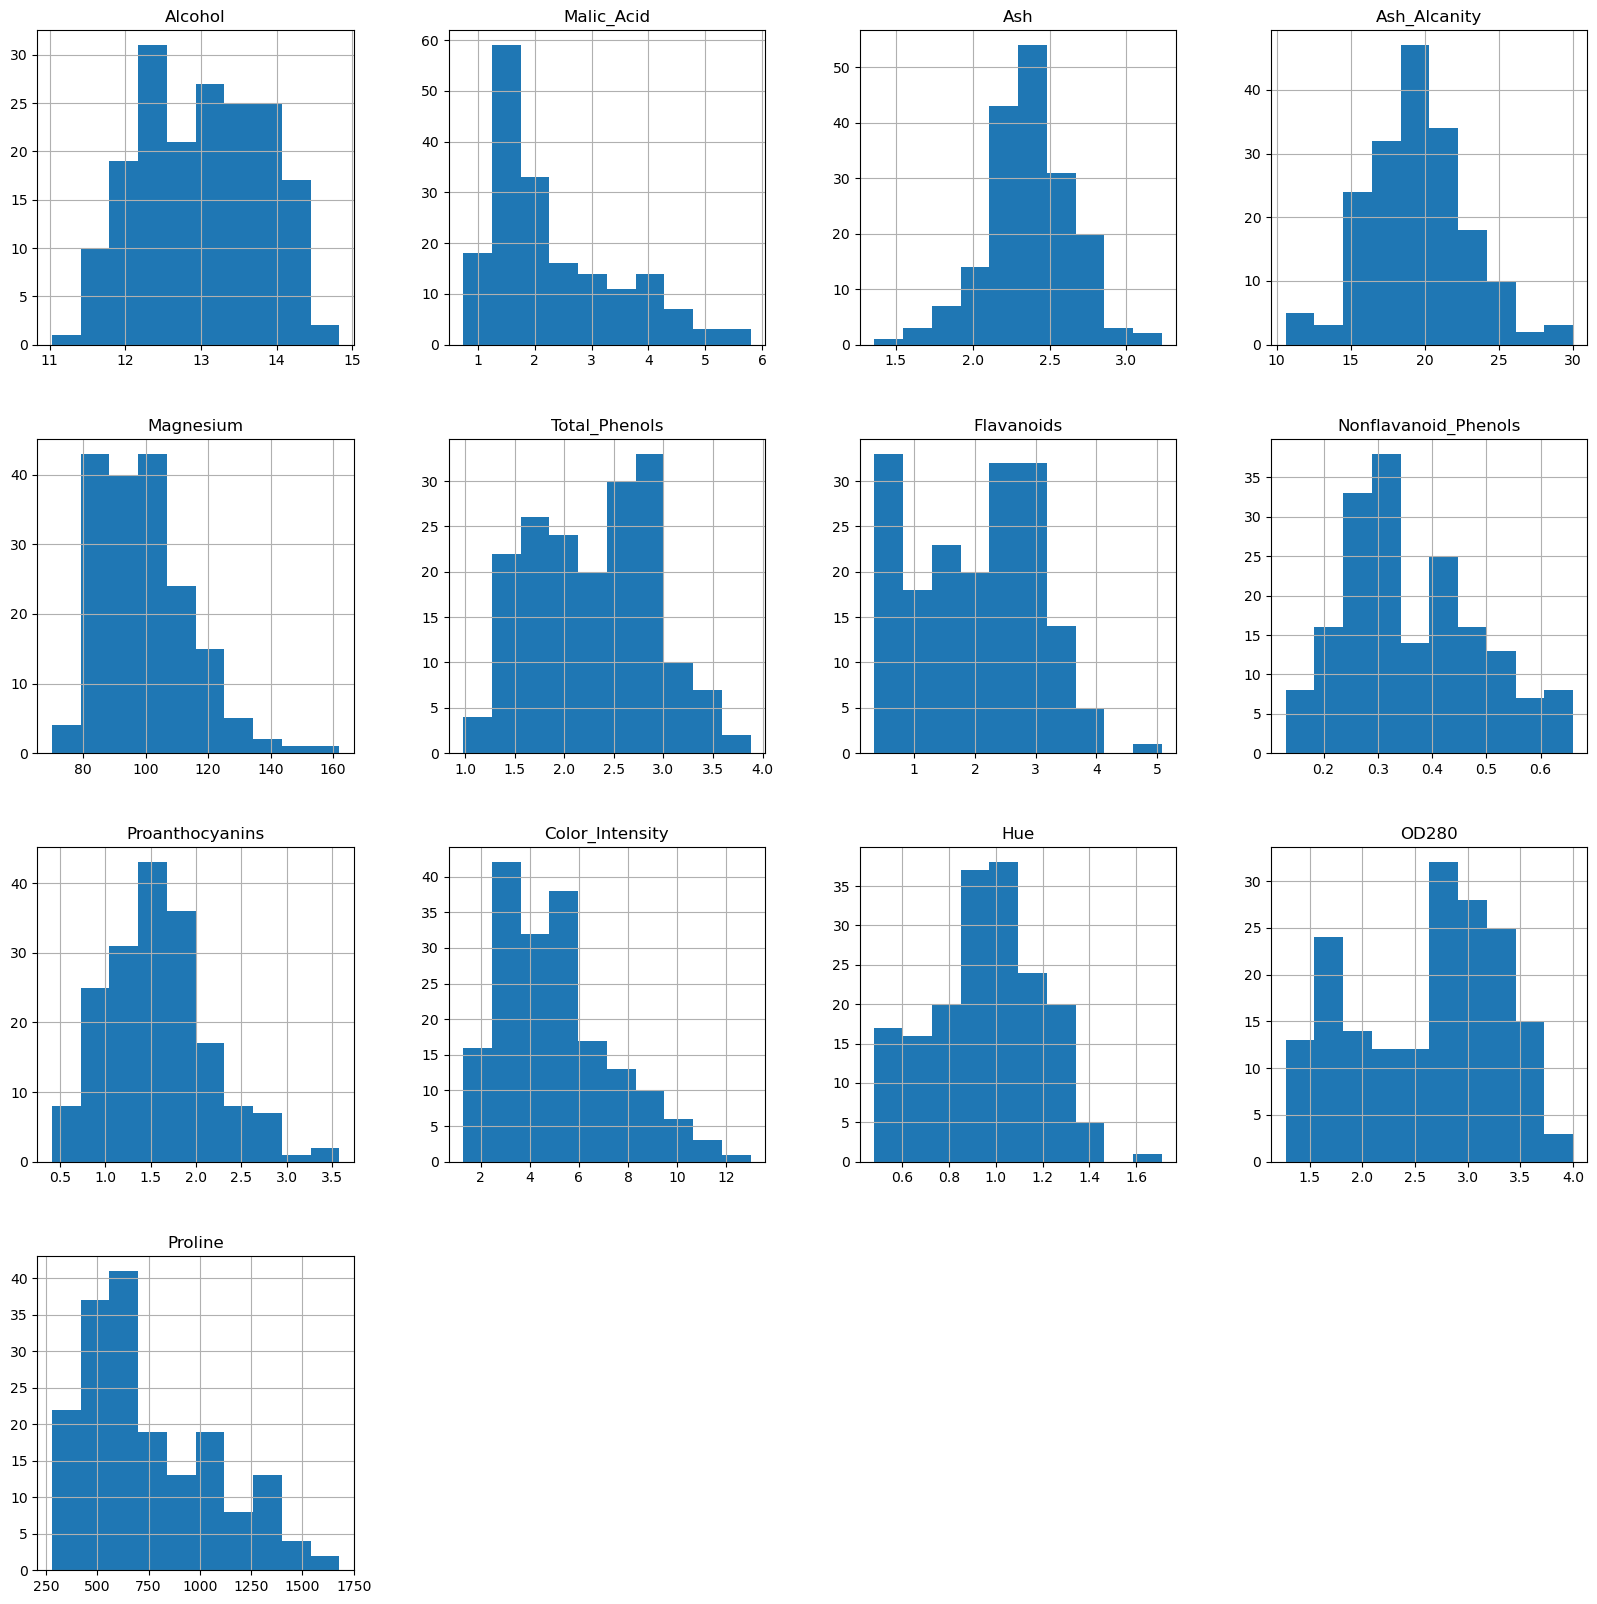

In [10]:
#Data Visualize
df.hist(figsize=(20,20));

# FEATURE SCALING 

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [12]:
sc = StandardScaler()
data_std = sc.fit_transform(df)
data_std = pd.DataFrame(data_std)
mm = MinMaxScaler()
mm_scale = mm.fit(data_std)
data_mm = mm_scale.transform(data_std)
print("feature scaling:",pd.DataFrame(data_mm).head())

feature scaling:          0         1         2         3         4         5         6   \
0  0.842105  0.191700  0.572193  0.257732  0.619565  0.627586  0.573840   
1  0.571053  0.205534  0.417112  0.030928  0.326087  0.575862  0.510549   
2  0.560526  0.320158  0.700535  0.412371  0.336957  0.627586  0.611814   
3  0.878947  0.239130  0.609626  0.319588  0.467391  0.989655  0.664557   
4  0.581579  0.365613  0.807487  0.536082  0.521739  0.627586  0.495781   

         7         8         9         10        11        12  
0  0.283019  0.593060  0.372014  0.455285  0.970696  0.561341  
1  0.245283  0.274448  0.264505  0.463415  0.780220  0.550642  
2  0.320755  0.757098  0.375427  0.447154  0.695971  0.646933  
3  0.207547  0.558360  0.556314  0.308943  0.798535  0.857347  
4  0.490566  0.444795  0.259386  0.455285  0.608059  0.325963  


# K-Means

In [13]:
from sklearn.cluster import KMeans

In [14]:
wcss = []
for i in range(1,12):
    kmeans = KMeans(n_clusters = i ,init = 'k-means++', random_state = 42)
    kmeans.fit(data_mm)
    wcss.append(kmeans.inertia_)

C:\Users\mayat\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [15]:
wcss

[95.5995377847106,
 64.5376670238943,
 48.960517136676486,
 44.76933054082478,
 42.457761630697505,
 39.71084694318323,
 38.25827849900965,
 36.259202203579044,
 34.360480459885984,
 33.082396572731554,
 32.33787322176101]

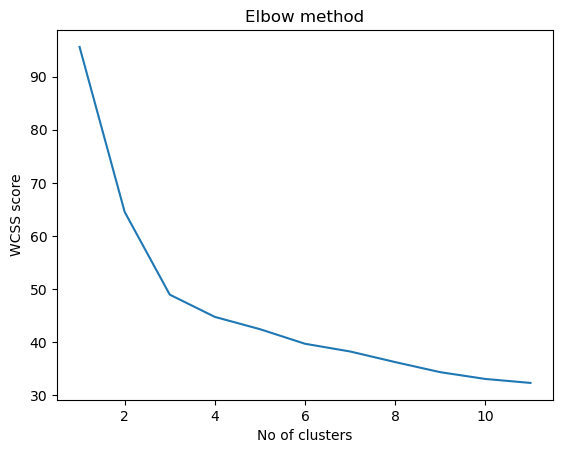

In [16]:
plt.plot(range(1,12),wcss)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('WCSS score')
plt.show()

In [17]:

kmeans = KMeans(n_clusters = 3 ,init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(data_mm)

In [18]:
y_kmeans

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [19]:
print(y_kmeans)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 1 1 0 0 0 0 0 0 1 0 1 0 0 2
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [20]:
from sklearn.metrics import silhouette_score
silhouette_sc = silhouette_score(df,y_kmeans)
print(silhouette_sc)

0.2205587270898549


# PCA

In [21]:
from sklearn.decomposition import PCA

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 0 0 1 1 1 1 1 1 0 1 0 1 1 2
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


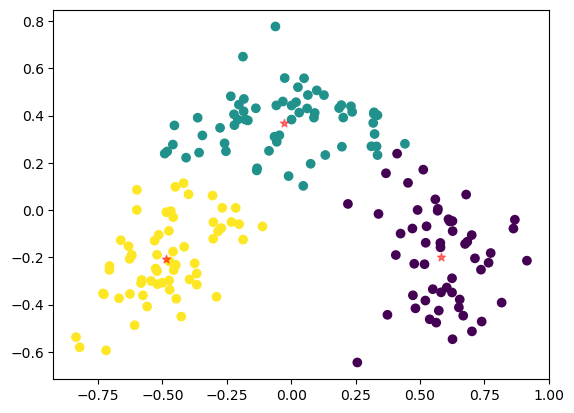

In [22]:
pca = PCA(n_components = 0.95)
pca.fit(data_mm)
data_PCA = pca.transform(data_mm)
kmeans.fit(data_PCA)
label_pca = kmeans.fit_predict(data_PCA)
print(label_pca)
plt.scatter(data_PCA[:,0], data_PCA[:,1], c=label_pca)
centers_PCA = kmeans.cluster_centers_
plt.scatter(centers_PCA[:,0], centers_PCA[:,1], c='red', marker='*',alpha=0.5)
plt.show()

# Hierarchical Clustering

In [23]:
import scipy.cluster.hierarchy as sch

Text(0.5, 1.0, 'Euclidian distance')

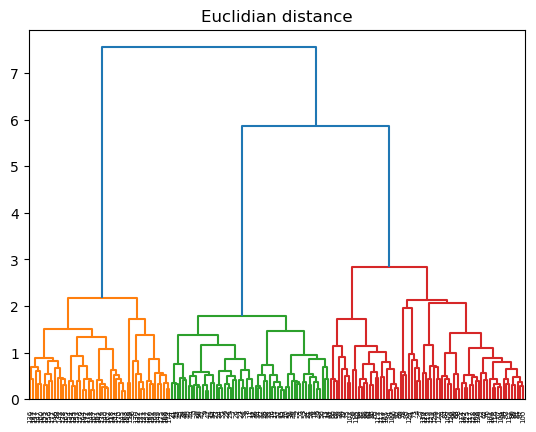

In [24]:
dendrogram = sch.dendrogram(sch.linkage(data_PCA,method = 'ward'))
plt.title('dendrogram')

plt.title('Euclidian distance')

In [25]:
from sklearn.cluster import AgglomerativeClustering

In [26]:
hc = AgglomerativeClustering(n_clusters = 3,affinity='euclidean',linkage='ward')
y_hc = hc.fit_predict(data_PCA)

In [27]:
from sklearn.metrics import silhouette_score
silhoutte_avg = silhouette_score(data_PCA,y_hc)
print(silhoutte_avg)

0.3046173731318078


# DBSCAN

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0 -1  0  0  0  0  0  0  0  0 -1  1  1  0  0  0  0 -1  0  1 -1 -1 -1
 -1 -1  0  0  0 -1 -1 -1  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0 -1
 -1  0  0 -1  0  0  0  0  0 -1  0  0  0  0 -1  0  0  0  0 -1  0  0  1  0
  0 -1 -1 -1 -1  0  0 -1  0  0  1  1  1  1  1  1 -1 -1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1]


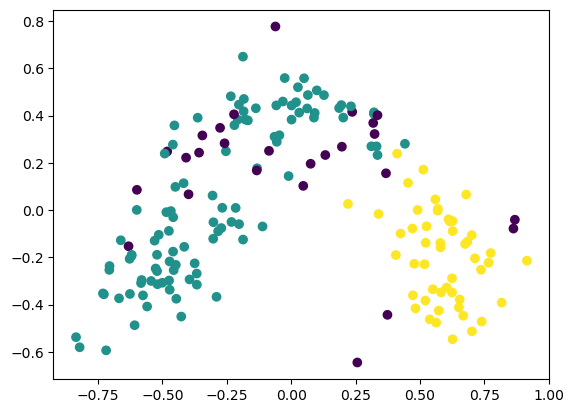

In [28]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = 0.45,min_samples=3) 
label_dbs = dbscan.fit_predict(data_PCA)
print(label_dbs)
plt.scatter(data_PCA[:,0], data_PCA[:,1], c=label_dbs)
plt.show()